# Análise de dados dos cursos do UDEMY por número de inscritos
#### Esta análise usa dados de cursos do Udemy coletados no Kaggle. O foco é realizar uma análise da correlação de uma série de variáveis e inscritos nos cursos.

In [1]:
#Importando bibliotecas usadas inicialmente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importando base de dados e visualizando 
data = pd.read_csv('../input/business-courses-udemy-10k-courses/udemy_output_All_Business_p1_p626.csv')
data.head(5)

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [3]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.447000e+03,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,9447.000000,8937.000000,9447.000000
mean,1.456603e+06,3399.298190,4.138522,4.124756,4.124756,299.054515,34.400868,0.101831,488.984111,4828.758336
std,8.956601e+05,10451.534122,0.453581,0.478410,0.478410,1826.867472,46.061088,0.580037,247.833161,3108.307674
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,455.000000,1280.000000
25%,6.730310e+05,141.000000,3.900000,3.879410,3.879410,12.000000,13.000000,0.000000,455.000000,1600.000000
50%,1.381806e+06,916.000000,4.200000,4.206080,4.206080,33.000000,23.000000,0.000000,455.000000,3840.000000
75%,2.154793e+06,2889.500000,4.450000,4.447495,4.447495,110.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

In [5]:
data.query('num_published_lectures == 0')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
609,1766420,PMP PMBOK 6 Practice Exams: Set One for PMP Ca...,/course/pmp_practice_exams_1/,True,6208,4.33465,4.28676,4.28676,782,False,0,5,2018-06-25T15:14:26Z,2018-07-16T18:33:14Z,488.0,INR,₹488,6400.0,INR,"₹6,400"
681,1591290,Agile Project Management Bootcamp: Agile Proje...,/course/agile-project-management-course/,True,5260,4.24667,4.20066,4.20066,682,False,0,2,2018-03-11T13:11:54Z,2018-03-12T06:52:39Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
709,1621470,"PMP Certification Exam Prep PMBOK 6th Edition,...",/course/pmp-practice-exams-pmbok-guide-6th-edi...,True,4224,4.28804,4.30258,4.30258,650,False,0,3,2018-03-29T12:05:18Z,2018-04-26T06:28:34Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
716,1491820,PRINCE2 Foundation Practice Certification Exam...,/course/prince2-foundation-practice-certificat...,True,6450,4.45181,4.38882,4.38882,640,False,0,6,2018-01-03T02:06:24Z,2018-03-10T20:27:03Z,462.0,INR,₹462,6400.0,INR,"₹6,400"
839,1636714,PMI-ACP Practice Exams - PMBOK 6,/course/pmi-acp-practice-exams-pmbok-6/,True,5731,4.18000,4.17322,4.17322,528,False,0,2,2018-04-08T15:50:04Z,2018-04-08T16:30:01Z,455.0,INR,₹455,3200.0,INR,"₹3,200"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,2175872,PMP - Project Management Professional pract...,/course/pmp-project-management-professional-pr...,True,30,4.00000,3.66165,3.66165,3,False,0,4,2019-01-25T14:52:25Z,2019-01-30T17:49:59Z,455.0,INR,₹455,2880.0,INR,"₹2,880"
9328,2842422,CIPS Advanced Diploma: Managing Contractual Ri...,/course/cips-l5m3-managing-contractual-risk/,True,15,3.66667,3.72142,3.72142,3,False,0,2,2020-02-29T00:56:29Z,2020-02-29T13:23:47Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9379,2781478,SCOPE AND INFLUENCE OF PROCUREMENT AND SUPPLY-...,/course/scope-and-influence-of-procurement-and...,True,30,3.66667,3.66316,3.66316,3,False,0,4,2020-01-27T10:22:10Z,2020-01-30T12:56:33Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
9401,2427030,Change Management Foundation based on ECMHBook,/course/change-management-foundation-based-on-...,True,96,3.33333,2.87283,2.87283,3,False,0,2,2019-06-24T04:35:06Z,2019-12-13T20:35:01Z,455.0,INR,₹455,2560.0,INR,"₹2,560"


#### É possível perceber que existem cursos sem aulas publicadas, esses não são cursos, mas exames práticos que utilizam testes como essa análise é de cursos. Dessa forma, não vão ser considerados como cursos para esta análise e serão retirados.

In [6]:
data = data.query('num_published_lectures > 0')
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,9.263000e+03,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,9263.000000,8757.000000,9263.000000
mean,1.440125e+06,3447.991040,4.143260,4.130015,4.130015,303.977221,35.084206,0.031955,487.275437,4868.850264
std,8.939289e+05,10544.441345,0.451043,0.474871,0.474871,1844.509839,46.257922,0.215603,240.558922,3111.880545
min,2.762000e+03,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,455.000000,1280.000000
25%,6.611100e+05,150.000000,3.900000,3.882860,3.882860,12.000000,14.000000,0.000000,455.000000,1600.000000
50%,1.354030e+06,952.000000,4.208330,4.210420,4.210420,33.000000,23.000000,0.000000,455.000000,4160.000000
75%,2.121547e+06,2931.000000,4.450000,4.450945,4.450945,112.000000,39.000000,0.000000,455.000000,8640.000000
max,3.469452e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,2.000000,3200.000000,12800.000000


#### O máximo de número de aulas publicadas é bem destoante dos quartis, é importante verificar.

In [7]:
#Dando alguns ajuses te cor e estilo ao seaborn.
sns.set_palette('PRGn')
sns.set_style('ticks')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de aulas publicadas'}, xlabel='Aulas publicadas', ylabel='Frequencia'>

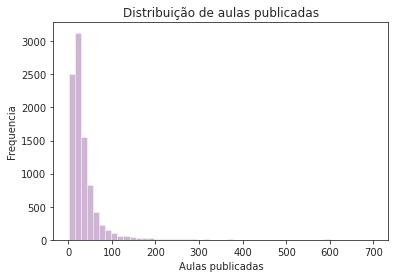

In [8]:
ax = sns.distplot(data['num_published_lectures'], kde=False, norm_hist=False)
ax.set_title('Distribuição de aulas publicadas')
ax.set(xlabel='Aulas publicadas', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Aulas publicadas'}, xlabel='num_published_lectures'>

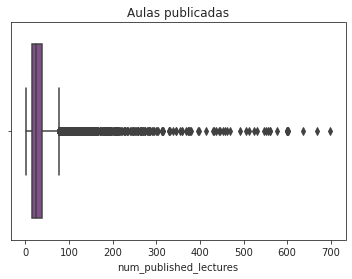

In [9]:
ax = sns.boxplot(data['num_published_lectures'])
ax.set_title('Aulas publicadas')
ax

In [10]:
data.query('num_published_lectures > 100')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
7,321410,Beginner to Pro in Excel: Financial Modeling a...,/course/beginner-to-pro-in-excel-financial-mod...,True,127680,4.54034,4.53346,4.53346,28665,False,275,0,2014-10-17T08:39:52Z,2014-11-25T23:00:40Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
8,673654,Become a Product Manager | Learn the Skills & ...,/course/become-a-product-manager-learn-the-ski...,True,112572,4.50386,4.50080,4.50080,27408,False,144,0,2015-11-18T19:35:12Z,2016-03-17T17:04:59Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9197,3311364,Emotional Intelligence Master Class: Complete ...,/course/emotional-intelligence-master-class-co...,True,33,4.33333,4.26262,4.26262,3,False,197,0,2020-07-08T05:36:24Z,2020-07-22T03:23:27Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
9212,581518,Results Coach Mastery,/course/resultscoachmastery/,True,32,4.16667,4.07336,4.07336,3,False,214,0,2015-08-12T19:52:09Z,2018-02-21T21:48:38Z,3200.0,INR,"₹3,200",8640.0,INR,"₹8,640"
9242,2749804,Mastering MS Excel - From Beginner to Advanced...,/course/microsoft-excel-from-start-to-finish/,True,11,5.00000,5.00000,5.00000,3,False,116,0,2020-01-09T19:36:14Z,2020-02-26T18:07:16Z,455.0,INR,₹455,1600.0,INR,"₹1,600"
9352,420926,CFA® Level 1 2014 – Financial Reporting and An...,/course/cfa-level1-fra/,True,164,4.66667,4.59733,4.59733,3,False,102,0,2015-02-13T09:20:17Z,2015-02-26T08:48:32Z,NaN,NaN,NaN,3200.0,INR,"₹3,200"


#### Os cursos muito longos são agregados de uma série de cursos de uma mesma área. O fato de existir grande preferência por esse tipo de curso deve ser considerado na análise. Seria possível segmentar a análise para tornar ela mais exata, entretanto nesse estudo será optado por manter uma análise geral, entendendo que o curso completo compete com o curso especializado e menos procurado. 

#### Agora, vamos explorar o número de inscritos, que é a variável dependente, para saber a qualidade dos dados.

In [11]:
#Dando alguns ajuses te cor e estilo ao seaborn.
sns.set_palette('PRGn')
sns.set_style('ticks')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

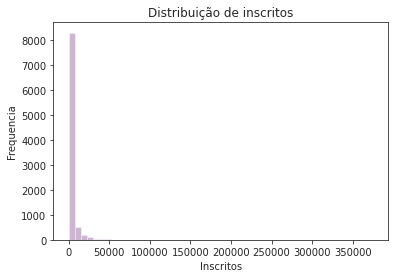

In [12]:
ax = sns.distplot(data['num_subscribers'], kde=False, norm_hist=False)
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

<AxesSubplot:title={'center':'Distribuição de inscritos'}, xlabel='Inscritos', ylabel='Frequencia'>

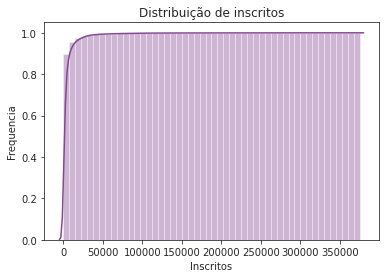

In [13]:
#Para confirmar que existe uma distribuição quase toda em valores muito baixos, 
#estou colocando de forma cumulativa, utilizando códigos do matplotlib. 
ax = sns.distplot(data['num_subscribers'], hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set_title('Distribuição de inscritos')
ax.set(xlabel='Inscritos', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Inscritos'}, xlabel='num_subscribers'>

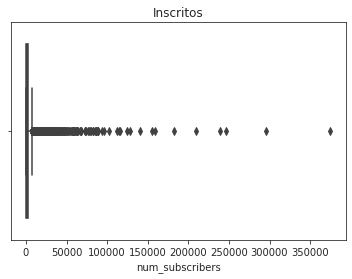

In [14]:
ax = sns.boxplot(data['num_subscribers'])
ax.set_title('Inscritos')
ax

In [15]:
data.query('num_subscribers > 100000')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
5,1208634,Microsoft Power BI - A Complete Introduction [...,/course/powerbi-complete-introduction/,True,124180,4.56228,4.57676,4.57676,38093,False,275,0,2017-05-08T13:03:21Z,2017-05-15T18:48:54Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
7,321410,Beginner to Pro in Excel: Financial Modeling a...,/course/beginner-to-pro-in-excel-financial-mod...,True,127680,4.54034,4.53346,4.53346,28665,False,275,0,2014-10-17T08:39:52Z,2014-11-25T23:00:40Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
8,673654,Become a Product Manager | Learn the Skills & ...,/course/become-a-product-manager-learn-the-ski...,True,112572,4.50386,4.50080,4.50080,27408,False,144,0,2015-11-18T19:35:12Z,2016-03-17T17:04:59Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
9,1653432,The Business Intelligence Analyst Course 2020,/course/the-business-intelligence-analyst-cour...,True,115269,4.50067,4.49575,4.49575,23906,False,413,0,2018-04-19T07:00:09Z,2018-04-25T18:40:55Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
15,1202988,The Complete Financial Analyst Training & Inve...,/course/the-complete-financial-analyst-trainin...,True,182002,4.49571,4.49507,4.49507,21421,False,225,0,2017-05-03T17:04:31Z,2017-08-17T17:53:15Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


#### Avaliando o número de inscritos, fica evidente que existe um descompasso nos cursos. Alguns com quantidades imensas de inscritos e outros com quantidades significativamente menores. É o mesmo tipo de problema na distribuição encontrado no número de aulas. Esse tipo de distribuição deve ser encontrada em outras variáveis e serão trabalhadas com uma transformação logarítmica para normalizar as distribuições.

#### Segue-se, portanto, com a visualização de outras variáveis relevantes na amostra.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia da nota média'}, xlabel='Nota média', ylabel='Frequencia'>

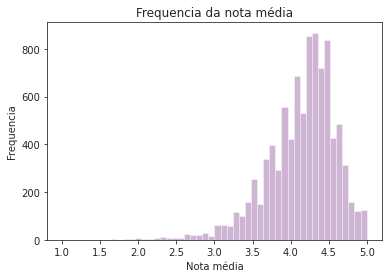

In [16]:
ax = sns.distplot(data['avg_rating'], kde=False, norm_hist=False)
ax.set_title('Frequencia da nota média')
ax.set(xlabel='Nota média', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='avg_rating'>

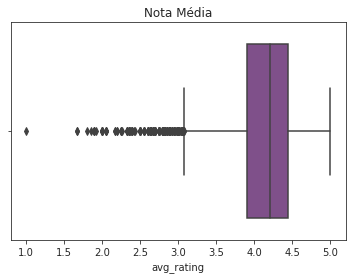

In [17]:
ax = sns.boxplot(data['avg_rating'])
ax.set_title('Nota Média')
ax

#### A nota média tem uma distribuição que tende para a direita, como é esperado do comportamento de avaliação de serviços, em que as pessoas tendem a dar notas mais altas. Há uma nota que parece ser 1 que merece ser investigada.

In [18]:
data.query('avg_rating == 1')

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
9374,2188386,Excel based Solar Plant Financial Modelling Co...,/course/online-solar-financial-modelling-course/,True,11,1.0,1.0,1.0,3,False,20,0,2019-01-31T09:32:14Z,2019-05-02T02:12:22Z,1200.0,INR,"₹1,200",4800.0,INR,"₹4,800"


#### O curso teve poucos inscritos, poucos avaliadores e uma nota baixa, o que é aceitável com somente 3 avaliadores. 

#### Como tratado anteriormente, cursos com poucos inscritos parecem fazer parte de cursos muito segmentados, sendo esse um extremo. Não parece ser o caso de um dado mal inscrito, mas de um curso péssimamente avaliado e com poucos alunos. Para a análise, é válido seguir com ele, pois ele representa um caso de falha que deve ser avaliado.

#### retirando valores com na, pois eles não poderão ser avaliados.

#### O mínimo do desconto não é zero, portanto os NA são, certamente, a ausência de desconto.
#### Dessa forma, é válido transoformar o NA em 0 para seguir o estudo. 

In [19]:
#Desconfiando de que existam na no desconto em cursos sem desconto, é melhor verificar.
data['discount_price__amount'].isna().sum()

506

In [20]:
data['discount_price__amount'] = data['discount_price__amount'].fillna(0)
data['discount_price__amount'].isna().sum()

0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de desconto do curso'}, xlabel='Desconto', ylabel='Frequencia'>

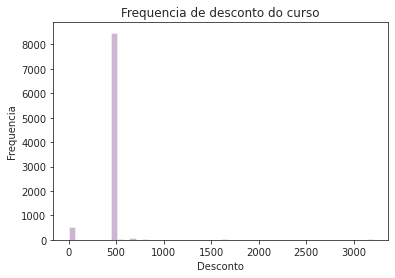

In [21]:
ax = sns.distplot(data['discount_price__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia de desconto do curso')
ax.set(xlabel='Desconto', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Nota Média'}, xlabel='discount_price__amount'>

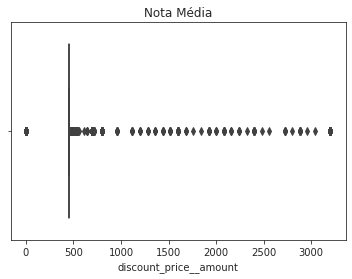

In [22]:
ax = sns.boxplot(data['discount_price__amount'])
ax.set_title('Nota Média')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia do custo do curso'}, xlabel='Custo', ylabel='Frequencia'>

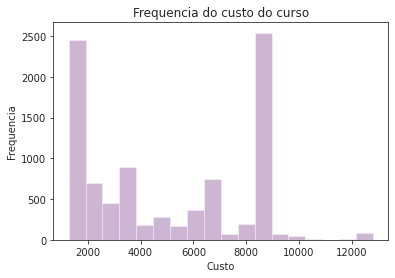

In [23]:
ax = sns.distplot(data['price_detail__amount'], kde=False, norm_hist=False)
ax.set_title('Frequencia do custo do curso')
ax.set(xlabel='Custo', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Custo'}, xlabel='price_detail__amount'>

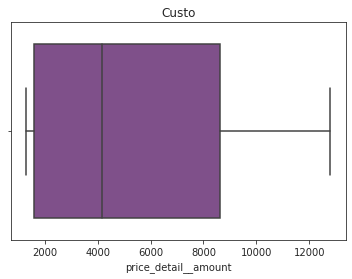

In [24]:
ax = sns.boxplot(data['price_detail__amount'])
ax.set_title('Custo')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequencia de avaliações do curso'}, xlabel='Avaliações', ylabel='Frequencia'>

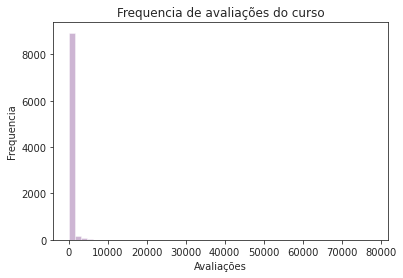

In [25]:
ax = sns.distplot(data['num_reviews'], kde=False, norm_hist=False)
ax.set_title('Frequencia de avaliações do curso')
ax.set(xlabel='Avaliações', ylabel='Frequencia')
ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Número de avaliações'}, xlabel='num_reviews'>

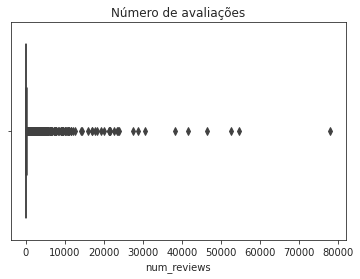

In [26]:
ax = sns.boxplot(data['num_reviews'])
ax.set_title('Número de avaliações')
ax

#### A transgformação logarítmica será necessária para normalizar a distribuição das amostras.

In [27]:
data['log_inscritos'] = np.log(data['num_subscribers'])
data['log_avaliacao_media'] = np.log(data['avg_rating'])
data['log_desconto'] = np.log(data['discount_price__amount']+1)
data['log_valor'] = np.log(data['price_detail__amount'])
data['log_aulas_publicadas'] = np.log(data['num_published_lectures'])
data['log_n_avaliacoes'] = np.log(data['num_reviews'])


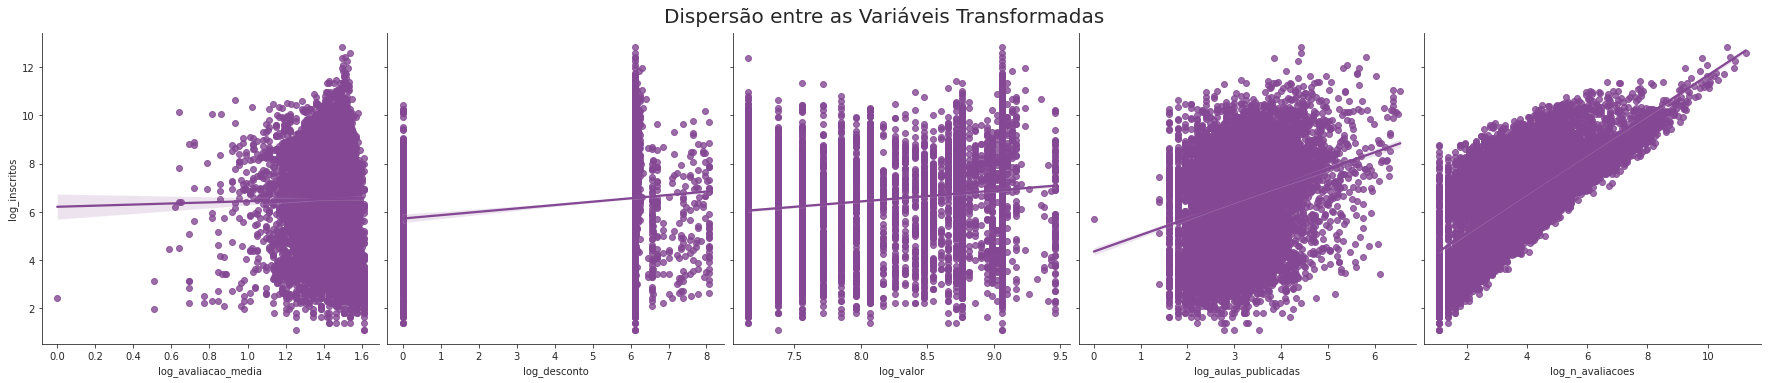

In [28]:
ax = sns.pairplot(data, y_vars='log_inscritos', x_vars=['log_avaliacao_media','log_desconto','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#### Avaliação média segue com muito peso em um dos lados e não apresenta boa distribuição.
#### Número de avaliações parece ser a variável mais eficiente. 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
y = data['log_inscritos']
X = data[['log_avaliacao_media','log_desconto','log_valor',
                                              'log_aulas_publicadas','log_n_avaliacoes']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
#A constante vai ser adicionada para aplicar OLS
import statsmodels.api as sm
X_train_com_constante = sm.add_constant(X_train)

In [33]:
modelo_stats_models = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [34]:
print(modelo_stats_models.summary())

                            OLS Regression Results                            
Dep. Variable:          log_inscritos   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     1469.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        02:42:38   Log-Likelihood:                -13108.
No. Observations:                7410   AIC:                         2.623e+04
Df Residuals:                    7404   BIC:                         2.627e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.0281 

#### O modelo saiu com uma probabilidade F abaixo de 0.00, o que indica significância, o Rquadrado de 0.5 é aceitável, porém baixo. 

#### Pela análise t, o valor não parece exibir efeito significativo, mas a média de avaliações, aulas publicadas e número de avialiações aparecem correlação. Sendo uma correlação negativa com avaliação média e positiva com os outros. O maior efeito foi em número de avaliações.

#### O modelo revela que um maior número de avaliações está fortemente correlacionado com o número de inscritos em um curso, o que é imaginável desde o início, pois é uma correlação de cursos com mais inscritos e mais avaliados. Como resultados interessantes tem-se:
#### Cursos com mais aulas potencialmente atraem mais alunos.
#### Descontos maiores atraem mais alunos.
#### Cursos com mais alunos tendem a ter avaliações piores.